In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
# Load and split the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Backend
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


4


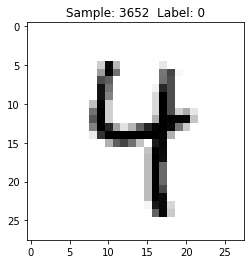

In [5]:
def sample(j):
    print(y_train[j])  
    output = y_train[j].argmax(axis=0)
    sample_image = X_train[j].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (j,  output))
    plt.imshow(sample_image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
sample(3652)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='LeakyReLU',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=30,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 - 18s - loss: 0.1660 - accuracy: 0.9496 - val_loss: 0.0503 - val_accuracy: 0.9821 - 18s/epoch - 10ms/step
Epoch 2/30
1875/1875 - 16s - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0494 - val_accuracy: 0.9836 - 16s/epoch - 8ms/step
Epoch 3/30
1875/1875 - 16s - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0489 - val_accuracy: 0.9849 - 16s/epoch - 9ms/step
Epoch 4/30
1875/1875 - 16s - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0471 - val_accuracy: 0.9844 - 16s/epoch - 8ms/step
Epoch 5/30
1875/1875 - 16s - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0444 - val_accuracy: 0.9867 - 16s/epoch - 8ms/step
Epoch 6/30
1875/1875 - 15s - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0497 - val_accuracy: 0.9845 - 15s/epoch - 8ms/step
Epoch 7/30
1875/1875 - 15s - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0438 - val_accuracy: 0.9862 - 15s/epoch - 8ms/step
Epoch 8/30
1875/1875 - 15s - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0456 - val_accuracy: 0.9865 - 15s/epoch - 

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)


In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07583083212375641
Test accuracy: 0.9886999726295471
